In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [171]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [172]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [173]:
data['TotalCharges'].isna().sum()

0

In [174]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [175]:
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

divide in bins (tenure)
remove female/male if possible
do some more bivariate analysis, you can very less features


In [176]:
df = data.drop('Churn', axis=1)
y = data['Churn']

In [177]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [178]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [101]:
data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [102]:
data.dropna(inplace=True)

In [103]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [104]:
df = data.drop('Churn', axis=1)
y = data['Churn']

In [106]:
y.shape

(7032,)

BIT OF EDA

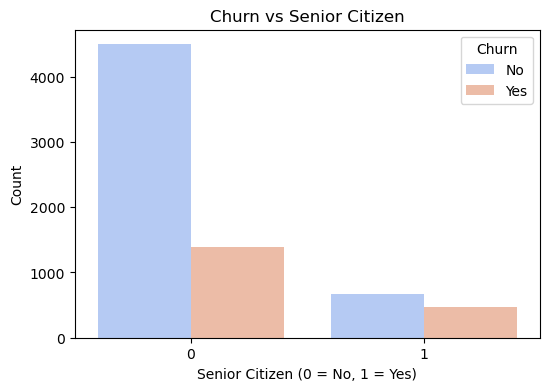

In [108]:
# Countplot to show churn distribution by Senior Citizen status
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='SeniorCitizen', hue='Churn', palette='coolwarm')

# Labels and title
plt.xlabel('Senior Citizen (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.title('Churn vs Senior Citizen')
plt.legend(title='Churn', labels=['No', 'Yes'])

plt.show()

senior citizens are more likely to churn

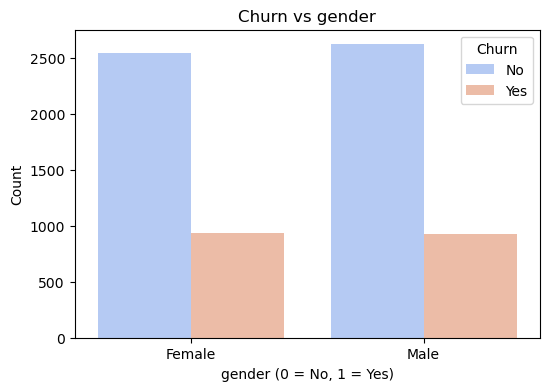

In [109]:
# Countplot to show churn distribution by Senior Citizen status
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='gender', hue='Churn', palette='coolwarm')

# Labels and title
plt.xlabel('gender (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.title('Churn vs gender')
plt.legend(title='Churn', labels=['No', 'Yes'])

plt.show()

Not much difference

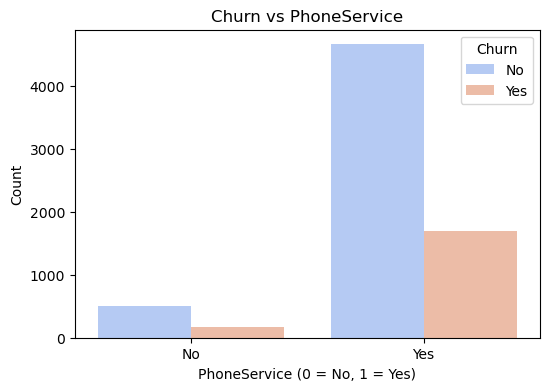

In [110]:
# Countplot to show churn distribution by Senior Citizen status
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='PhoneService', hue='Churn', palette='coolwarm')

# Labels and title
plt.xlabel('PhoneService (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.title('Churn vs PhoneService')
plt.legend(title='Churn', labels=['No', 'Yes'])

plt.show()

In [111]:
import scipy.stats as stats

categorical_features = data.select_dtypes(include=['object', 'category', 'bool']).columns  # Select categorical columns

for col in categorical_features:
    contingency_table = pd.crosstab(data[col], data['Churn'])  # Create contingency table
    chi2, p, _, _ = stats.chi2_contingency(contingency_table)  # Chi-Square test
    
    print(f"Feature: {col}")
    print(f"Chi-Square P-value: {p}")
    print("Significant" if p < 0.05 else "Not Significant")
    print("-" * 30)


Feature: customerID
Chi-Square P-value: 0.494393294442787
Not Significant
------------------------------
Feature: gender
Chi-Square P-value: 0.4904884707065509
Not Significant
------------------------------
Feature: Partner
Chi-Square P-value: 3.9737975745159094e-36
Significant
------------------------------
Feature: Dependents
Chi-Square P-value: 2.0196592017051303e-42
Significant
------------------------------
Feature: PhoneService
Chi-Square P-value: 0.34992398942431924
Not Significant
------------------------------
Feature: MultipleLines
Chi-Square P-value: 0.0035679273999811405
Significant
------------------------------
Feature: InternetService
Chi-Square P-value: 5.831198962237274e-159
Significant
------------------------------
Feature: OnlineSecurity
Chi-Square P-value: 1.4006867477839222e-184
Significant
------------------------------
Feature: OnlineBackup
Chi-Square P-value: 7.776099238804966e-131
Significant
------------------------------
Feature: DeviceProtection
Chi-Square 

In [112]:
df.drop(columns=['customerID', 'gender', 'PhoneService'], axis=1, inplace=True)

In [113]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,Yes,No,1,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,0,No,No,34,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,0,No,No,2,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,0,No,No,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,0,No,No,2,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [114]:
data['Churn'] = data['Churn'].map({"Yes": 1, "No": 0})

In [115]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [116]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [117]:
from scipy.stats import pointbiserialr

numerical_features = data.select_dtypes(include=['int64', 'float64']).columns  # Select numeric columns

for col in numerical_features:
    if col != 'Churn':  # Skip Churn itself
        corr, pval = pointbiserialr(data[col], data['Churn'])
        print(f"Feature: {col}")
        print(f"Correlation: {corr}")
        print(f"P-value: {pval}")
        print("Significant" if pval < 0.05 else "Not Significant")
        print("-" * 30)


Feature: SeniorCitizen
Correlation: 0.15054105341567198
P-value: 6.377294711656906e-37
Significant
------------------------------
Feature: tenure
Correlation: -0.35404935895325207
P-value: 9.437650217550912e-207
Significant
------------------------------
Feature: MonthlyCharges
Correlation: 0.1928582184700784
P-value: 6.760843117982433e-60
Significant
------------------------------
Feature: TotalCharges
Correlation: -0.19948408356756406
P-value: 4.87686568969594e-64
Significant
------------------------------


In [118]:
data.dropna(inplace=True)

In [119]:
remaining_fts = [col for col in data.columns if col in df.columns]

In [120]:
len(remaining_fts)

17

In [121]:
df.nunique()

SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
dtype: int64

ENCODING THE CATEGORICAL DATA

In [122]:
cat_fts = [col for col in df.columns if df[col].nunique() == 2]

In [123]:
cat_fts

['SeniorCitizen', 'Partner', 'Dependents', 'PaperlessBilling']

In [124]:
encoder_1 = LabelEncoder()
for col in df.columns:
    df[col] = encoder_1.fit_transform(df[col])

In [125]:
df[cat_fts]

,SeniorCitizen,Partner,Dependents,PaperlessBilling
0,0,1,0,1
1,0,0,0,0
2,0,0,0,1
3,0,0,0,0
4,0,0,0,1
...,...,...,...,...
7038,0,1,1,1
7039,0,1,1,1
7040,0,1,1,1
7041,1,1,0,1


In [126]:
categorical_features = [col for col in df.columns if col in categorical_features]

In [127]:
categorical_features

['Partner',
 'Dependents',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [128]:
cat_fts_2 = [col for col in categorical_features if col not in cat_fts]

In [129]:
cat_fts_2

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

In [130]:
encoder_2 = OneHotEncoder()
df_encoded = encoder_2.fit_transform(df[cat_fts_2])

In [131]:
df_encoded = df_encoded.toarray()
df_encoded_df = pd.DataFrame(df_encoded, columns=encoder_2.get_feature_names_out(), index=df.index)

In [132]:
df_encoded_df

,MultipleLines_0,MultipleLines_1,MultipleLines_2,InternetService_0,InternetService_1,InternetService_2,OnlineSecurity_0,OnlineSecurity_1,OnlineSecurity_2,OnlineBackup_0,...,StreamingMovies_0,StreamingMovies_1,StreamingMovies_2,Contract_0,Contract_1,Contract_2,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7039,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7040,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7041,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [133]:
df.drop(cat_fts_2, axis=1, inplace=True)

In [134]:
for col in df_encoded_df.columns:
    df[col] = df_encoded_df[col]

In [135]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_0,MultipleLines_1,MultipleLines_2,...,StreamingMovies_0,StreamingMovies_1,StreamingMovies_2,Contract_0,Contract_1,Contract_2,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3
0,0,1,0,0,1,142,74,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0,0,33,0,497,3624,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0,0,0,1,1,435,536,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,0,0,44,0,266,3570,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0,0,0,1,1,728,674,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


scaling

In [147]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

In [148]:
print(X_train.shape)
print(X_test.shape)

(5625, 38)
(1407, 38)


In [149]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [152]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

X_train_scaled_df.head()

,SeniorCitizen,Partner,Dependents,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_0,MultipleLines_1,MultipleLines_2,InternetService_0,...,StreamingMovies_1,StreamingMovies_2,Contract_0,Contract_1,Contract_2,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3,tenure_group
6030,-0.43759,-0.962481,-0.653684,0.831397,-0.678546,0.346641,-0.97143,3.040707,-0.845541,1.389132,...,-0.529847,1.247260,0.906729,-0.518272,-0.561130,1.919270,-0.527645,-0.714758,-0.547427,0.113642
3410,-0.43759,-0.962481,-0.653684,-1.202795,-0.534583,-1.176526,1.02941,-0.328871,-0.845541,1.389132,...,-0.529847,-0.801758,0.906729,-0.518272,-0.561130,-0.521031,1.895214,-0.714758,-0.547427,-1.402929
5483,-0.43759,1.038981,-0.653684,0.831397,0.358402,1.045402,-0.97143,-0.328871,1.182675,-0.719874,...,-0.529847,-0.801758,0.906729,-0.518272,-0.561130,-0.521031,-0.527645,1.399076,-0.547427,0.871927
5524,-0.43759,1.038981,1.529791,-1.202795,-0.482423,0.513478,1.02941,-0.328871,-0.845541,1.389132,...,-0.529847,-0.801758,-1.102865,-0.518272,1.782119,1.919270,-0.527645,-0.714758,-0.547427,0.113642
6337,-0.43759,1.038981,1.529791,-1.202795,1.284769,1.281756,-0.97143,-0.328871,1.182675,-0.719874,...,-0.529847,1.247260,-1.102865,1.929487,-0.561130,-0.521031,-0.527645,-0.714758,1.826727,0.871927


MODEL TRAINING

In [153]:
X_train = X_train_scaled_df
X_test = X_test_scaled_df

In [165]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = LogisticRegression(max_iter=500)  
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7910447761194029

Confusion Matrix:
 [[933 100]
 [194 180]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.48      0.55       374

    accuracy                           0.79      1407
   macro avg       0.74      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [164]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Confusion Matrix:
 [[919 114]
 [194 180]]

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.61      0.48      0.54       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



In [163]:
from xgboost import XGBClassifier

scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
xgb_model = XGBClassifier(scale_pos_weight=scale_pos_weight, eval_metric="logloss")

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on test data
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("XGBoost Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nXGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))

XGBoost Confusion Matrix:
 [[802 231]
 [125 249]]

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.78      0.82      1033
           1       0.52      0.67      0.58       374

    accuracy                           0.75      1407
   macro avg       0.69      0.72      0.70      1407
weighted avg       0.77      0.75      0.76      1407



In [161]:
y_train = y_train.map({"Yes": 1, "No": 0})
y_test = y_test.map({"Yes": 1, "No": 0})

In [166]:
import shap
import numpy as np
import pandas as pd

# Ensure the model is trained before this step
explainer = shap.TreeExplainer(xgb_model)  # Replace 'xgb_model' with your trained XGBoost model
shap_values = explainer.shap_values(X_train)  # Extract SHAP values

# Convert SHAP values to feature importance
shap_importance = pd.DataFrame({
    "Feature": X_train.columns, 
    "SHAP Value": np.abs(shap_values).mean(axis=0)  # Take absolute mean SHAP values
}).sort_values(by="SHAP Value", ascending=True)

print(shap_importance.head(15))  # View least important features

# Set threshold (e.g., remove bottom 5 features)
num_features_to_remove = 10
low_importance_features = shap_importance["Feature"].iloc[:num_features_to_remove].tolist()

# Drop from dataset
X_train_2 = X_train.drop(columns=low_importance_features)
X_test_2 = X_test.drop(columns=low_importance_features)

print(f"Removed features: {low_importance_features}")

               Feature  SHAP Value
19  DeviceProtection_1    0.000000
25       StreamingTV_1    0.000000
16      OnlineBackup_1    0.000000
28   StreamingMovies_1    0.000000
13    OnlineSecurity_1    0.000000
22       TechSupport_1    0.000000
11   InternetService_2    0.004116
14    OnlineSecurity_2    0.017730
17      OnlineBackup_2    0.024455
18  DeviceProtection_0    0.031110
23       TechSupport_2    0.036462
29   StreamingMovies_2    0.037953
20  DeviceProtection_2    0.038981
26       StreamingTV_2    0.039410
8      MultipleLines_2    0.043283
Removed features: ['DeviceProtection_1', 'StreamingTV_1', 'OnlineBackup_1', 'StreamingMovies_1', 'OnlineSecurity_1', 'TechSupport_1', 'InternetService_2', 'OnlineSecurity_2', 'OnlineBackup_2', 'DeviceProtection_0']


In [167]:
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
xgb_model = XGBClassifier(scale_pos_weight=scale_pos_weight, eval_metric="logloss")

# Train the model
xgb_model.fit(X_train_2, y_train)

# Predict on test data
y_pred_xgb = xgb_model.predict(X_test_2)

# Evaluate the model
print("XGBoost Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nXGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))

XGBoost Confusion Matrix:
 [[809 224]
 [132 242]]

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.78      0.82      1033
           1       0.52      0.65      0.58       374

    accuracy                           0.75      1407
   macro avg       0.69      0.72      0.70      1407
weighted avg       0.77      0.75      0.75      1407



NUERAL NETWORK

In [169]:
#neural network
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

class_weight = {0: 1, 1: 5}  # Adjust based on class distribution


# Build Optimized Neural Network
model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(8, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train Model
history = model.fit(X_train, y_train, epochs=50, batch_size=40, class_weight=class_weight, validation_data=(X_test, y_test))

# Evaluate Model
y_pred = (model.predict(X_test) > 0.5).astype(int)
f1 = f1_score(y_test, y_pred)

print(f"F1 Score: {f1:.4f}")

Epoch 1/50


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5161 - loss: 1.5417 - val_accuracy: 0.6404 - val_loss: 0.6267
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 716us/step - accuracy: 0.5895 - loss: 1.0961 - val_accuracy: 0.6162 - val_loss: 0.6850
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - accuracy: 0.6195 - loss: 1.0367 - val_accuracy: 0.6226 - val_loss: 0.6879
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - accuracy: 0.6470 - loss: 0.9776 - val_accuracy: 0.6382 - val_loss: 0.6752
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step - accuracy: 0.6500 - loss: 0.9861 - val_accuracy: 0.6326 - val_loss: 0.6729
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step - accuracy: 0.6599 - loss: 0.9680 - val_accuracy: 0.6482 - val_loss: 0.6592
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step - accuracy: 0.6612 - loss: 0.9614 - val_accuracy: 0.6560 - val_loss: 0.6501
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step - accuracy: 0.6709 - loss: 0.9408 - val_accuracy: